# **Mumbai House Price Prediction**

**Importing packages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

**Importing dataset**

Source: https://www.kaggle.com/sameep98/housing-prices-in-mumbai

**Content**

This data contains scraped data and has the following information:
1) Prices of houses all over Mumbai along with their location
2) Information about house condition (new/resale) and area of the house
3) Information about various amenities provided

In [2]:
df = pd.read_csv('Mumbai1.csv')

In [3]:
df.head()

,Unnamed: 0,Price,Area,Location,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
0,0,4850000,720,Kharghar,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0
1,1,4500000,600,Kharghar,1,0,1,1,1,1,1,0,1,0,0,0,0,1,1
2,2,6700000,650,Kharghar,1,0,1,1,1,1,1,1,1,1,0,0,0,1,1
3,3,4500000,650,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0
4,4,5000000,665,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0


In [4]:
print('No of rows => {}\nNo of columns => {}'.format(df.shape[0], df.shape[1]))

No of rows => 6347
No of columns => 19


**Visualization**

In [5]:
sns.set(style='whitegrid')

Text(0, 0.5, 'Price')

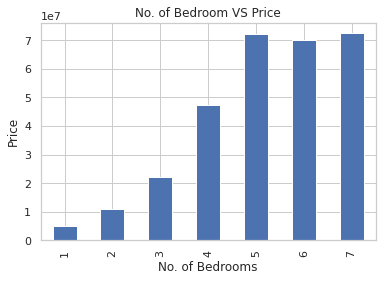

In [6]:
df.groupby('No. of Bedrooms')['Price'].median().plot.bar()
plt.title("No. of Bedroom VS Price")
plt.ylabel("Price")

Price of house is higher if number of bedrooms are more

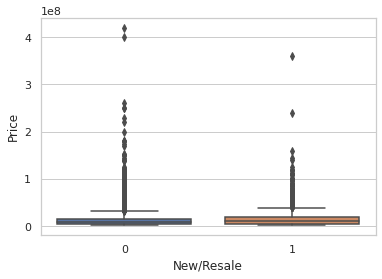

In [7]:
sns.boxplot(y=df['Price'], x=df['New/Resale'])

The price of the house doesn't depend much on whether the house is new or it is being re-sold. There are many outliers.

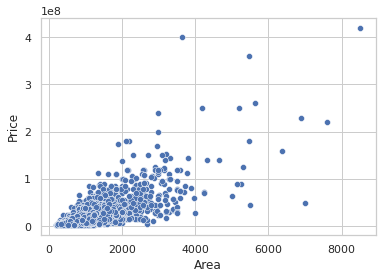

In [8]:
sns.scatterplot(x=df['Area'], y=df['Price'])

Price and Area are correlated.But there are some outliers.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Outliers')

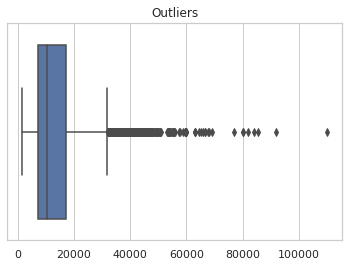

In [9]:
temp = df['Price']/df['Area']
sns.boxplot(temp)
plt.title('Outliers')

**Removing outliers**

In [10]:
mean = temp.mean()
std = temp.std()
temp = temp[(temp>(mean-std)) & (temp<(mean+std))].index
df = df.loc[temp, :]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'After outlier removal')

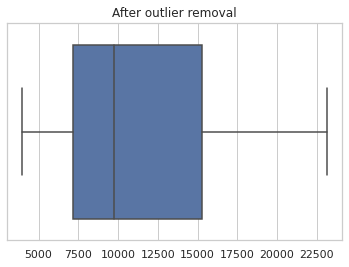

In [11]:
sns.boxplot(df['Price']/df['Area'])
plt.title('After outlier removal')

The location attribute is the only categorical attribute. It has many unique values as shown below

In [12]:
df['Location'].value_counts()

Kharghar                533
Thane West              409
Mira Road East          389
Ulwe                    317
Kalyan West             174
                       ... 
West Amardeep Colony      1
Yogi Hills                1
Sector 30                 1
Kharodi                   1
Haridas Nagar             1
Name: Location, Length: 345, dtype: int64

Replacing all locations by a new category **"Other"** whose count is less than 100.

In [13]:
locations = df.groupby('Location')['Location'].agg('count')
locations

Location
4 Bunglows                        1
Adaigaon                          1
Airoli                           27
Ambernath East                    9
Ambernath West                   10
                                 ..
sec 50 new                        1
taloja panchanand                 8
thakur village kandivali east     3
vasant vihar thane west           4
vrindavan society                 1
Name: Location, Length: 345, dtype: int64

In [14]:
common_locations = locations[locations>=100]
common_locations

Location
Borivali West     152
Chembur           123
Kalyan West       174
Kamothe           103
Kandivali East    126
Kandivali West    105
Kharghar          533
Malad West        156
Mira Road East    389
Nala Sopara       137
Panvel            135
Powai             104
Thane West        409
Ulwe              317
Virar             101
Name: Location, dtype: int64

In [15]:
df['Location'] = df['Location'].apply(lambda x: 'Other' if x not in common_locations else x)

In [16]:
df['Location'].unique()

array(['Kharghar', 'Other', 'Virar', 'Malad West', 'Mira Road East',
       'Kandivali West', 'Borivali West', 'Kandivali East', 'Ulwe',
       'Thane West', 'Chembur', 'Kamothe', 'Panvel', 'Nala Sopara',
       'Kalyan West', 'Powai'], dtype=object)

Dropping unnamed column

In [17]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [18]:
df.head()

,Price,Area,Location,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
0,4850000,720,Kharghar,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0
1,4500000,600,Kharghar,1,0,1,1,1,1,1,0,1,0,0,0,0,1,1
2,6700000,650,Kharghar,1,0,1,1,1,1,1,1,1,1,0,0,0,1,1
3,4500000,650,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0
4,5000000,665,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0


**Set features and labels**

In [19]:
x = df.loc[:, 'Area':'Swimming Pool'].values

In [20]:
y = df['Price'].values.reshape(-1,1)

We use one hot encoding for Location attribute and MinMax Scaling to scale the values

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
x = np.array(ct.fit_transform(x))

In [22]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
x[:,:] = sc.fit_transform(x[:, :])

**Train and Test Splitting**

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

**Model building**

In [24]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Predict output and see results**

In [25]:
y_pred = regressor.predict(x_test)

In [26]:
comparison = {
    'actual': y_test.flatten(),
    'predicted': y_pred.flatten()
}

In [27]:
temp = pd.DataFrame(comparison)
temp.head(10)

,actual,predicted
0,16000000,11227136.0
1,7000000,7270400.0
2,7500000,8155136.0
3,4850000,1097728.0
4,12500000,15642624.0
5,14000000,15077376.0
6,21000000,19664896.0
7,4300000,7409664.0
8,18000000,12840960.0
9,15200000,15790080.0


**Statistics**

In [28]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score 
print('Mean Squared Error => ', mean_squared_error(y_test,y_pred))
print('Mean Absolute Error => ', mean_absolute_error(y_test,y_pred))
print('R2 score => ', r2_score(y_test,y_pred))

Mean Squared Error =>  21159653930320.773
Mean Absolute Error =>  3254886.681061073
R2 score =>  0.7372241836886114
